In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

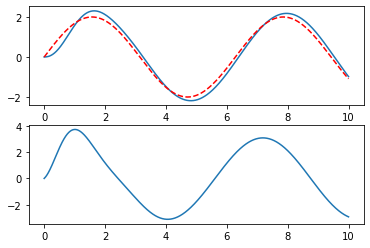

55.607183591249665


In [43]:
p1 = 1
p2 = 0
def dx_dt(x, u):
    return u + p1*(p2-x)

def regulator(Kp, Ti, T_const, u_min, u_max): 
    uk_i = 0
    def P_reg(y_m, y_sp): 
            u = Kp*(y_sp-y_m)
            return u
        
    def PI_reg(y_m, y_sp): 
            nonlocal uk_i 
            error = (y_sp-y_m)
            u = Kp*error
            uk_i += T_const*Kp/Ti*error
            
            u_out = u + uk_i
            
            if uk_i < u_min: uk_i = u_min
            elif uk_i > u_max: uk_i = u_max
                
            if u_out < u_min: u_out = u_min
            elif u_out > u_max: u_out = u_max
                
            return u_out
        
    if Ti > 10000: return P_reg
    else: return PI_reg
    

t1 = 0 
t2 = 10 
N = 1000 
dt = (t2-t1)/N

Kp = 1
Ti = 10
T_const = 1
reg = regulator(Kp, Ti, T_const, -5, 5)

x0 = 0
x_set = 7
x_set = np.sin(t)*2
u = 1*np.ones(N)
t = np.linspace(t1, t2, N)
x = []
u = []

for i in range(N): 
    u_el = reg(x0, x_set[i])
    x0 += dt*dx_dt(x0, u_el)
    u.append(u_el)
    x.append(x0) 

fig, ax = plt.subplots(2,1)
ax[0].plot(t, x)
ax[0].plot(t, x_set*np.ones(N), 'r--')
ax[1].plot(t, u)

plt.show()

print(np.sum(np.square(np.array(x) - np.ones(N)*x_set)))

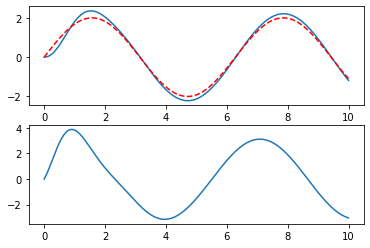

31.126611462266688


In [42]:
p1 = 1
p2 = 0
def dx_dt(x, u):
    return u + p1*(p2-x)

def regulator(Kp, Ti, T_const, u_min, u_max): 
    uk_i = 0
    def P_reg(y_m, y_sp): 
            u = Kp*(y_sp-y_m)
            return u
        
    def PI_reg(y_m, y_sp): 
            nonlocal uk_i 
            error = (y_sp-y_m)
            u = Kp*error
            uk_i += T_const*Kp/Ti*error
            
            u_out = u + uk_i
            
            if uk_i < u_min: uk_i = u_min
            elif uk_i > u_max: uk_i = u_max
                
            if u_out < u_min: u_out = u_min
            elif u_out > u_max: u_out = u_max
                
            return u_out
        
    if Ti > 10000: return P_reg
    else: return PI_reg

def model_reg(Kp, Ti, T_const, u_min, u_max): 
    standard_reg = regulator(Kp, Ti, T_const, u_min, u_max)
    y_k = 0 
    def model_controller(y_m, y_sp): 
        nonlocal y_k
        dy_dt = (y_m-y_k)
        y_k = y_m
        u_m = dy_dt - p1*(p2-y_sp)
        
        u_out = u_m + standard_reg(y_m, y_sp)
        
        if u_out < u_min: u_out = u_min
        elif u_out > u_max: u_out = u_max
        
        return u_out
    return model_controller    
    

t1 = 0 
t2 = 10 
N = 1000 
dt = (t2-t1)/N

Kp = 1
Ti = 10
T_const = 1
reg = model_reg(Kp, Ti, T_const, -10, 10)

x0 = 0
x_set = 7*np.ones(N)
x_set = np.sin(t)*2
#u = 1*np.ones(N)
t = np.linspace(t1, t2, N)
x = []
u = []

for i in range(N): 
    u_el = reg(x0, x_set[i])
    x0 += dt*dx_dt(x0, u_el)
    u.append(u_el)
    x.append(x0) 

fig, ax = plt.subplots(2,1)
ax[0].plot(t, x)
ax[0].plot(t, x_set*np.ones(N), 'r--')
ax[1].plot(t, u)

plt.show()

print(np.sum(np.square(np.array(x) - np.ones(N)*x_set)))